# SW1PerS: Sliding Windows and 1-Persistence Scoring

### MSRI-UP 2023

Authors: Jose Perea 

Date: 06/14/2023


---


### Activity: 

Write a python function which takes as input a time series $f$, enconded as a list or an array, a time delay $\tau > 0$, an embedding dimension $d \in \mathbb{N}$, a number of points `n_data`, and returns the corresponding sliding window point cloud   

In [27]:
## Your work here

import pandas as pd

data = pd.read_excel('mice_data')








/Applications/Coding/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Sparkline Group extension is not supported and will be removed
  for idx, row in parser.parse():
/Applications/Coding/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [26]:
## Test it here



In [30]:
import numpy as np

def sliding_window_point_cloud(sinx, tau, d, n_data):
    # Check if the input parameters are valid
    if tau <= 0:
        raise ValueError("Time delay (tau) must be greater than zero.")
    if d <= 0:
        raise ValueError("Embedding dimension (d) must be a positive integer.")
    if n_data <= 0:
        raise ValueError("Number of points (n_data) must be a positive integer.")
    if len(sinx) < (d-1)*tau + n_data:
        raise ValueError("Time series is too short for the given time delay, embedding dimension, and number of points.")
    
    # Create the sliding window point cloud
    point_cloud = np.zeros((n_data, d))
    for i in range(n_data):
        start_index = i * tau
        end_index = start_index + d
        point_cloud[i] = sinx[start_index:end_index]
    
    return point_cloud


In [31]:
import numpy as np

# Generate a time series sinx
time = np.linspace(0, 2*np.pi, num=1000)
sinx = np.sin(time)

# Specify the parameters for sliding window point cloud generation
tau = 5
embedding_dim = 4
num_points = 10

result = sliding_window_point_cloud(sinx, tau, embedding_dim, num_points)
print(result)


[[0.         0.00628943 0.01257862 0.0188673 ]
 [0.03144219 0.03772789 0.0440121  0.05029457]
 [0.06285329 0.06912904 0.07540206 0.0816721 ]
 [0.09420224 0.10046184 0.10671747 0.11296887]
 [0.12545803 0.13169529 0.13792734 0.14415393]
 [0.15658976 0.16279851 0.16900082 0.17519644]
 [0.18756665 0.19374075 0.19990719 0.20606571]
 [0.21835807 0.22449141 0.23061587 0.23673121]
 [0.24893355 0.25502008 0.26109651 0.26716262]
 [0.27926288 0.28529657 0.29131896 0.29732984]]


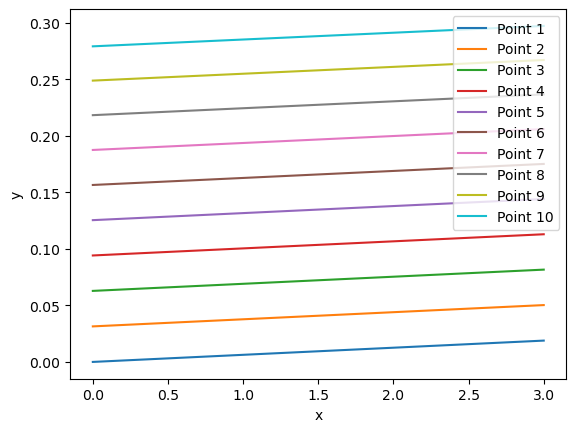

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the data
data = np.array([[0.        , 0.00628943, 0.01257862, 0.0188673 ],
                 [0.03144219, 0.03772789, 0.0440121 , 0.05029457],
                 [0.06285329, 0.06912904, 0.07540206, 0.0816721 ],
                 [0.09420224, 0.10046184, 0.10671747, 0.11296887],
                 [0.12545803, 0.13169529, 0.13792734, 0.14415393],
                 [0.15658976, 0.16279851, 0.16900082, 0.17519644],
                 [0.18756665, 0.19374075, 0.19990719, 0.20606571],
                 [0.21835807, 0.22449141, 0.23061587, 0.23673121],
                 [0.24893355, 0.25502008, 0.26109651, 0.26716262],
                 [0.27926288, 0.28529657, 0.29131896, 0.29732984]])

# Get the dimensions of the data
embedding_dim, num_points = data.shape

# Create the cubic spline interpolation
x = np.arange(num_points)
cs = CubicSpline(x, data.T, axis=0)  # Transpose the data array

# Generate x values for the cubic spline
x_interp = np.linspace(0, num_points-1, num=100)

# Evaluate the cubic spline at the x values
y_interp = cs(x_interp).T  # Transpose the result

# Plot the sliding window point cloud
for i in range(embedding_dim):
    plt.plot(x_interp, y_interp[i], label=f'Point {i+1}')  # Remove the slicing [:, i]

# Set the labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()


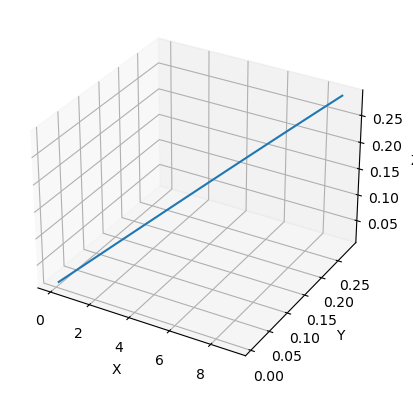

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline

# Define the data
data = np.array([[0.        , 0.00628943, 0.01257862, 0.0188673 ],
                 [0.03144219, 0.03772789, 0.0440121 , 0.05029457],
                 [0.06285329, 0.06912904, 0.07540206, 0.0816721 ],
                 [0.09420224, 0.10046184, 0.10671747, 0.11296887],
                 [0.12545803, 0.13169529, 0.13792734, 0.14415393],
                 [0.15658976, 0.16279851, 0.16900082, 0.17519644],
                 [0.18756665, 0.19374075, 0.19990719, 0.20606571],
                 [0.21835807, 0.22449141, 0.23061587, 0.23673121],
                 [0.24893355, 0.25502008, 0.26109651, 0.26716262],
                 [0.27926288, 0.28529657, 0.29131896, 0.29732984]])

# Get the dimensions of the data
num_points, embedding_dim = data.shape

# Create the cubic spline interpolation for each dimension
x_interp = np.arange(num_points)
x_cs = CubicSpline(x_interp, data[:, 0])
y_cs = CubicSpline(x_interp, data[:, 1])
z_cs = CubicSpline(x_interp, data[:, 2])

# Generate x values for the cubic spline
x_interp_vals = np.linspace(0, num_points-1, num=100)

# Evaluate the cubic spline at the x values
y_interp_vals = y_cs(x_interp_vals)
z_interp_vals = z_cs(x_interp_vals)

# Plot the sliding window point cloud in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_interp_vals, y_interp_vals, z_interp_vals)

# Set the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


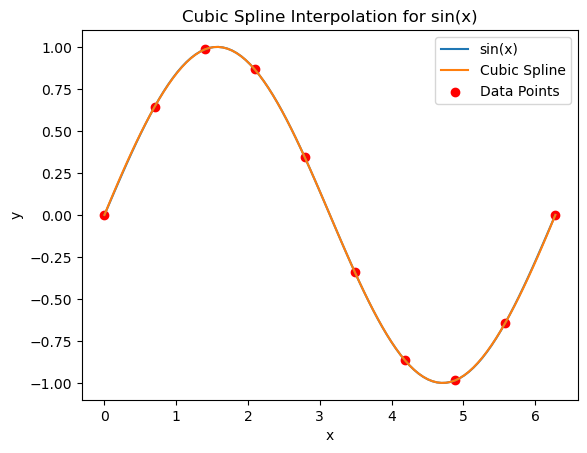

In [66]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Define the x-values
x = np.linspace(0, 2*np.pi, 10)

# Compute the y-values based on sin(x)
y = np.sin(x)

# Perform cubic spline interpolation
cs = CubicSpline(x, y)

# Define a finer x-grid for plotting
x_interp = np.linspace(0, 2*np.pi, 100)

# Generate the interpolated y-values
y_interp = cs(x_interp)

# Plot the original and interpolated data
plt.plot(x_interp, np.sin(x_interp), label='sin(x)')
plt.plot(x_interp, y_interp, label='Cubic Spline')
plt.scatter(x, y, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation for sin(x)')
plt.show()


In [71]:
import numpy as np
from scipy.interpolate import interp2d

# Define the data
data = np.array([[0.0, 0.00628943, 0.01257862, 0.0188673],
                 [0.03144219, 0.03772789, 0.0440121, 0.05029457],
                 [0.06285329, 0.06912904, 0.07540206, 0.0816721],
                 [0.09420224, 0.10046184, 0.10671747, 0.11296887],
                 [0.12545803, 0.13169529, 0.13792734, 0.14415393],
                 [0.15658976, 0.16279851, 0.16900082, 0.17519644],
                 [0.18756665, 0.19374075, 0.19990719, 0.20606571],
                 [0.21835807, 0.22449141, 0.23061587, 0.23673121],
                 [0.24893355, 0.25502008, 0.26109651, 0.26716262],
                 [0.27926288, 0.28529657, 0.29131896, 0.29732984]])

# Get the shape of the data
m, n = data.shape

# Create the x and y grids
x = np.arange(n)
y = np.arange(m)

# Create a function for cubic spline interpolation
interp_func = interp2d(x, y, data, kind='cubic')

# Define a finer x and y grid for interpolation
x_interp = np.linspace(0, n-1, 100)
y_interp = np.linspace(0, m-1, 100)

# Generate the interpolated data
data_interp = interp_func(x_interp, y_interp)

# Print the interpolated data
print(data_interp)


[[-1.03887617e-18  1.90589709e-04  3.81179439e-04 ...  1.84861874e-02
   1.86767440e-02  1.88673000e-02]
 [ 2.85884868e-03  3.04943762e-03  3.24002648e-03 ...  2.13444730e-02
   2.15350188e-02  2.17255639e-02]
 [ 5.71767382e-03  5.90826044e-03  6.09884686e-03 ...  2.42025838e-02
   2.43931173e-02  2.45836498e-02]
 ...
 [ 2.73768124e-01  2.73951429e-01  2.74134723e-01 ...  2.91501290e-01
   2.91683599e-01  2.91865896e-01]
 [ 2.76516632e-01  2.76699787e-01  2.76882932e-01 ...  2.94234786e-01
   2.94416935e-01  2.94599073e-01]
 [ 2.79262880e-01  2.79445883e-01  2.79628876e-01 ...  2.96965876e-01
   2.97147863e-01  2.97329840e-01]]


/var/folders/l9/kb1k6btx4p117sjp97398yhr0000gn/T/ipykernel_42740/2649729915.py:24: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interp2d(x, y, data, kind='cubic')
/var/folders/l9/kb1k6btx4p117sjp97398yhr0000gn/T/ipykernel_42740/2649729915.py:31: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bi

/var/folders/l9/kb1k6btx4p117sjp97398yhr0000gn/T/ipykernel_42740/2883441832.py:25: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interp2d(x, y, data, kind='cubic')
/var/folders/l9/kb1k6btx4p117sjp97398yhr0000gn/T/ipykernel_42740/2883441832.py:32: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bi

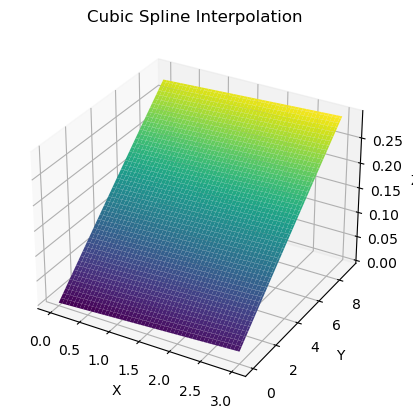

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

# Define the data
data = np.array([[0.0, 0.00628943, 0.01257862, 0.0188673],
                 [0.03144219, 0.03772789, 0.0440121, 0.05029457],
                 [0.06285329, 0.06912904, 0.07540206, 0.0816721],
                 [0.09420224, 0.10046184, 0.10671747, 0.11296887],
                 [0.12545803, 0.13169529, 0.13792734, 0.14415393],
                 [0.15658976, 0.16279851, 0.16900082, 0.17519644],
                 [0.18756665, 0.19374075, 0.19990719, 0.20606571],
                 [0.21835807, 0.22449141, 0.23061587, 0.23673121],
                 [0.24893355, 0.25502008, 0.26109651, 0.26716262],
                 [0.27926288, 0.28529657, 0.29131896, 0.29732984]])

# Get the shape of the data
m, n = data.shape

# Create the x and y grids
x = np.arange(n)
y = np.arange(m)

# Create a function for cubic spline interpolation
interp_func = interp2d(x, y, data, kind='cubic')

# Define a finer x and y grid for interpolation
x_interp = np.linspace(0, n-1, 100)
y_interp = np.linspace(0, m-1, 100)

# Generate the interpolated data
data_interp = interp_func(x_interp, y_interp)

# Create a meshgrid for the x and y coordinates
X, Y = np.meshgrid(x_interp, y_interp)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, data_interp, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cubic Spline Interpolation')

# Show the plot
plt.show()


In [75]:
import numpy as np

def sliding_window_point_cloud(time_series, tau, d, n_data):
    # Length of the time series
    n = len(time_series)
    
    # Number of windows to generate
    n_windows = n_data - (d-1)*tau
    
    # Initialize the sliding window point cloud
    point_cloud = np.zeros((n_windows, d))
    
    # Generate the sliding window point cloud
    for i in range(n_windows):
        for j in range(d):
            index = i*tau + j*tau
            point_cloud[i, j] = time_series[index]
    
    return point_cloud


In [80]:
time_series = [0.0, 0.00628943, 0.01257862, 0.0188673, 0.03144219, 0.03772789, 0.0440121, 0.05029457, 0.06285329, 0.06912904, 0.07540206, 0.0816721, 0.09420224, 0.10046184, 0.10671747, 0.11296887, 0.12545803, 0.13169529, 0.13792734, 0.14415393, 0.15658976, 0.16279851, 0.16900082, 0.17519644, 0.18756665, 0.19374075, 0.19990719, 0.20606571, 0.21835807, 0.22449141, 0.23061587, 0.23673121, 0.24893355, 0.25502008, 0.26109651, 0.26716262, 0.27926288, 0.28529657, 0.29131896, 0.29732984]
tau = 1
d = 4
n_data = 10

point_cloud = sliding_window_point_cloud(time_series, tau, d, n_data)
print(point_cloud)


[[0.         0.00628943 0.01257862 0.0188673 ]
 [0.00628943 0.01257862 0.0188673  0.03144219]
 [0.01257862 0.0188673  0.03144219 0.03772789]
 [0.0188673  0.03144219 0.03772789 0.0440121 ]
 [0.03144219 0.03772789 0.0440121  0.05029457]
 [0.03772789 0.0440121  0.05029457 0.06285329]
 [0.0440121  0.05029457 0.06285329 0.06912904]]


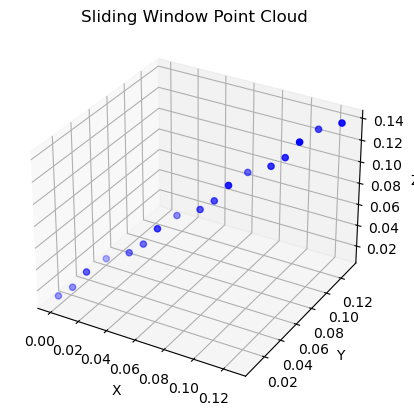

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sliding_window_point_cloud(time_series, tau, d, n_data):
    # Length of the time series
    n = len(time_series)
    
    # Number of windows to generate
    n_windows = n_data - (d-1)*tau
    
    # Initialize the sliding window point cloud
    point_cloud = np.zeros((n_windows, d))
    
    # Generate the sliding window point cloud
    for i in range(n_windows):
        for j in range(d):
            index = i*tau + j*tau
            point_cloud[i, j] = time_series[index]
    
    return point_cloud

# Example usage
time_series = [0.0, 0.00628943, 0.01257862, 0.0188673, 0.03144219, 0.03772789, 0.0440121, 0.05029457, 0.06285329, 0.06912904, 0.07540206, 0.0816721, 0.09420224, 0.10046184, 0.10671747, 0.11296887, 0.12545803, 0.13169529, 0.13792734, 0.14415393, 0.15658976, 0.16279851, 0.16900082, 0.17519644, 0.18756665, 0.19374075, 0.19990719, 0.20606571, 0.21835807, 0.22449141, 0.23061587, 0.23673121, 0.24893355, 0.25502008, 0.26109651, 0.26716262, 0.27926288, 0.28529657, 0.29131896, 0.29732984]
tau = 1
d = 4
n_data = 20

# Generate the sliding window point cloud
point_cloud = sliding_window_point_cloud(time_series, tau, d, n_data)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='blue')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sliding Window Point Cloud')

# Show the plot
plt.show()


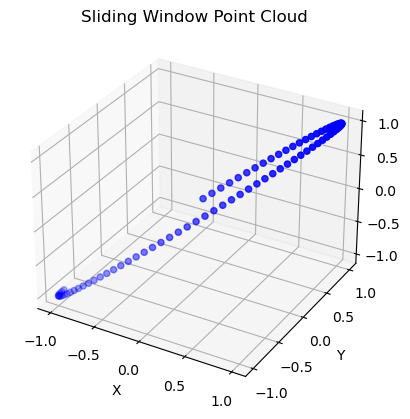

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def sliding_window_point_cloud(time_series, tau, d, n_data):
    # Length of the time series
    n = len(time_series)
    
    # Number of windows to generate
    n_windows = n_data - (d-1)*tau
    
    # Initialize the sliding window point cloud
    point_cloud = np.zeros((n_windows, d))
    
    # Generate the sliding window point cloud
    for i in range(n_windows):
        for j in range(d):
            index = i*tau + j*tau
            point_cloud[i, j] = time_series[index]
    
    return point_cloud

# Generate sine wave time series
t = np.linspace(0, 2*np.pi, 1000)
time_series = np.sin(t)

# Parameters for sliding window point cloud
tau = 10
d = 3
n_data = 100

# Generate the sliding window point cloud
point_cloud = sliding_window_point_cloud(time_series, tau, d, n_data)

# Plot the sliding window point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sliding Window Point Cloud')

plt.show()


In [87]:
import numpy as np
import plotly.graph_objects as go

def sliding_window_point_cloud(time_series, tau, d, n_data):
    # Length of the time series
    n = len(time_series)
    
    # Number of windows to generate
    n_windows = n_data - (d-1)*tau
    
    # Initialize the sliding window point cloud
    point_cloud = np.zeros((n_windows, d))
    
    # Generate the sliding window point cloud
    for i in range(n_windows):
        for j in range(d):
            index = i*tau + j*tau
            point_cloud[i, j] = time_series[index]
    
    return point_cloud

# Generate sine wave time series
t = np.linspace(0, 2*np.pi, 1000)
time_series = np.sin(t)

# Parameters for sliding window point cloud
tau = 10
d = 3
n_data = 100

# Generate the sliding window point cloud
point_cloud = sliding_window_point_cloud(time_series, tau, d, n_data)

# Extract coordinates for plotting
x = point_cloud[:, 0]
y = point_cloud[:, 1]
z = point_cloud[:, 2]

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color='blue'))])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  title='Sliding Window Point Cloud')
fig.show()


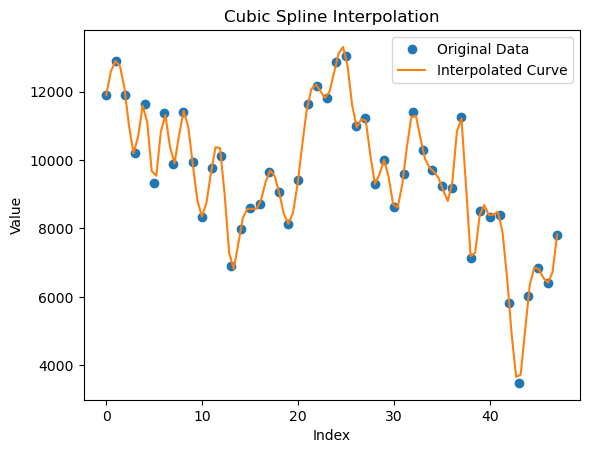

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

data = [11895.2, 12898, 11911.3, 10194.2, 11634.3, 9322.2, 11362.2, 9880.3, 11402.3, 9936.2, 8346.8, 9777.8, 10107.9, 6893.2, 7986.2, 8590.2, 8712, 9665.2, 9078.2, 8135.7, 9414.7, 11632.1, 12177.2, 11827.4, 12872.9, 13042.2, 11006.8, 11218.4, 9310.2, 10006, 8614.1, 9586.7, 11399.3, 10281.4, 9697.8, 9230.4, 9170.1, 11266, 7142.2, 8505.6, 8349, 8381.1, 5824.5, 3483, 6019.2, 6851, 6411.8, 7820]

# Convert the data to a numpy array
time_series = np.array(data)

# Define the x-values for the original data
x = np.arange(len(time_series))

# Perform cubic spline interpolation
cs = CubicSpline(x, time_series)

# Define a finer x grid for plotting
x_interp = np.linspace(0, len(time_series) - 1, 100)

# Compute the interpolated values
y_interp = cs(x_interp)

# Plot the original data and interpolated curve
plt.plot(x, time_series, 'o', label='Original Data')
plt.plot(x_interp, y_interp, label='Interpolated Curve')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Cubic Spline Interpolation')

# Show the legend
plt.legend()

# Display the plot
plt.show()


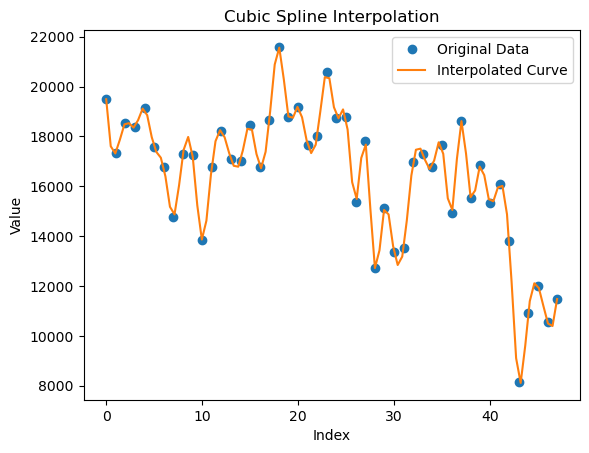

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def plot_cubic_spline_interpolation(time_series):
    # Convert the data to a numpy array
    time_series = np.array(time_series)

    # Define the x-values for the original data
    x = np.arange(len(time_series))

    # Perform cubic spline interpolation
    cs = CubicSpline(x, time_series)

    # Define a finer x grid for plotting
    x_interp = np.linspace(0, len(time_series) - 1, 100)

    # Compute the interpolated values
    y_interp = cs(x_interp)

    # Plot the original data and interpolated curve
    plt.plot(x, time_series, 'o', label='Original Data')
    plt.plot(x_interp, y_interp, label='Interpolated Curve')

    # Set labels and title
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Cubic Spline Interpolation')

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()

data = [19494.2, 17352.1, 18554.1, 18380.1, 19133.7, 17574.4, 16778.7, 14786.6, 17291.2, 17252.2, 13845.6, 16773.6, 18236.5, 17100.1, 17017.1, 18457.5, 16770.5, 18643.4, 21593.4, 18788.1, 19196, 17665.4, 18017.8, 20601.3, 18740.6, 18799.5, 15372.9, 17803, 12742, 15122.7, 13372.7, 13508.2, 16995.3, 17309.2, 16788.3, 17640.6, 14914.8, 18605.8, 15531.9, 16844.5, 15344, 16086.7, 13809.1, 8143.5, 10924.2, 12018.7, 10550.9, 11479.1]

plot_cubic_spline_interpolation(data)


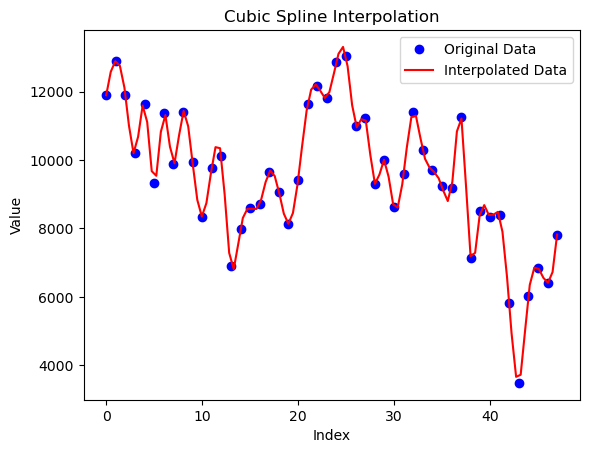

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

data = [11895.2, 12898, 11911.3, 10194.2, 11634.3, 9322.2, 11362.2, 9880.3, 11402.3, 9936.2, 8346.8, 9777.8, 10107.9, 6893.2, 7986.2, 8590.2, 8712, 9665.2, 9078.2, 8135.7, 9414.7, 11632.1, 12177.2, 11827.4, 12872.9, 13042.2, 11006.8, 11218.4, 9310.2, 10006, 8614.1, 9586.7, 11399.3, 10281.4, 9697.8, 9230.4, 9170.1, 11266, 7142.2, 8505.6, 8349, 8381.1, 5824.5, 3483, 6019.2, 6851, 6411.8, 7820]

# Convert data to NumPy array
data = np.array(data)

# Length of the data
n = len(data)

# X coordinates for the data points
x = np.arange(n)

# Create a cubic spline object
cs = CubicSpline(x, data)

# Define a finer x grid for interpolation
x_interp = np.linspace(0, n-1, 100)

# Perform cubic spline interpolation
data_interp = cs(x_interp)

# Plot the original data and the interpolated data
plt.plot(x, data, 'bo', label='Original Data')
plt.plot(x_interp, data_interp, 'r-', label='Interpolated Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()


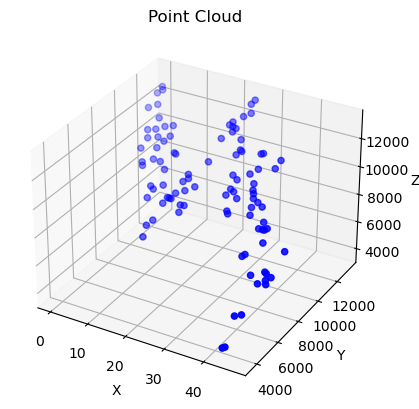

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline

data = [11895.2, 12898, 11911.3, 10194.2, 11634.3, 9322.2, 11362.2, 9880.3, 11402.3, 9936.2, 8346.8, 9777.8, 10107.9, 6893.2, 7986.2, 8590.2, 8712, 9665.2, 9078.2, 8135.7, 9414.7, 11632.1, 12177.2, 11827.4, 12872.9, 13042.2, 11006.8, 11218.4, 9310.2, 10006, 8614.1, 9586.7, 11399.3, 10281.4, 9697.8, 9230.4, 9170.1, 11266, 7142.2, 8505.6, 8349, 8381.1, 5824.5, 3483, 6019.2, 6851, 6411.8, 7820]

# Convert data to NumPy array
data = np.array(data)

# Length of the data
n = len(data)

# X coordinates for the data points
x = np.arange(n)

# Create a cubic spline object
cs = CubicSpline(x, data)

# Define a finer x grid for interpolation
x_interp = np.linspace(0, n-1, 100)

# Perform cubic spline interpolation
data_interp = cs(x_interp)

# Create the point cloud
point_cloud = np.column_stack((x_interp, data_interp))

# Plot the 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 1], c='blue')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud')

# Show the plot
plt.show()


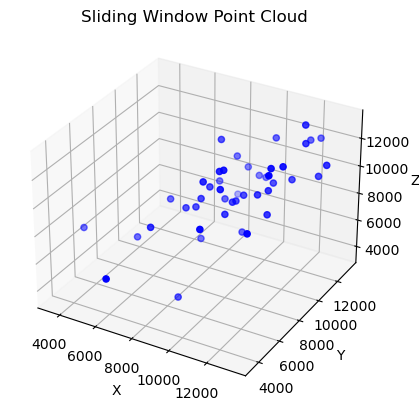

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline

def generate_sliding_window_point_cloud(time_series, tau, d, n_data):
    # Convert time series to NumPy array
    data = np.array(time_series)

    # Length of the data
    n = len(data)

    # X coordinates for the data points
    x = np.arange(n)

    # Create a cubic spline object
    cs = CubicSpline(x, data)

    # Define a finer x grid for interpolation
    x_interp = np.linspace(0, n - 1, n_data)

    # Perform cubic spline interpolation
    data_interp = cs(x_interp)

    # Initialize the sliding window point cloud
    point_cloud = np.zeros((n_data - (d - 1) * tau, d))

    # Generate the sliding window point cloud
    for i in range(n_data - (d - 1) * tau):
        for j in range(d):
            index = i + j * tau
            point_cloud[i, j] = data_interp[index]

    return point_cloud

# Example usage
time_series = [11895.2, 12898, 11911.3, 10194.2, 11634.3, 9322.2, 11362.2, 9880.3, 11402.3, 9936.2, 8346.8, 9777.8, 10107.9, 6893.2, 7986.2, 8590.2, 8712, 9665.2, 9078.2, 8135.7, 9414.7, 11632.1, 12177.2, 11827.4, 12872.9, 13042.2, 11006.8, 11218.4, 9310.2, 10006, 8614.1, 9586.7, 11399.3, 10281.4, 9697.8, 9230.4, 9170.1, 11266, 7142.2, 8505.6, 8349, 8381.1, 5824.5, 3483, 6019.2, 6851, 6411.8, 7820]
tau = 1
d = 3
n_data = len(time_series) - (d - 1) * tau + 1

# Generate the sliding window point cloud
point_cloud = generate_sliding_window_point_cloud(time_series, tau, d, n_data)

# Plot the 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='blue')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sliding Window Point Cloud')

# Show the plot
plt.show()
